<a href="https://colab.research.google.com/github/mechworrior/Freecodecamp_Data_Analysis_Cert/blob/main/medical_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv("medical_examination.csv")

# Add 'overweight' column



In [ ]:
df['overweight'] = (df['weight'] / (df['height']**2) * 10000) // 25
df.loc[df['overweight']>1,"overweight"]=1
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df.loc[df['gluc']==1,"gluc"]=0
df.loc[df['gluc']>1,"gluc"]=1
df.loc[df['cholesterol']==1,"cholesterol"]=0
df.loc[df['cholesterol']>1,"cholesterol"]=1

In [ ]:

df


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0.0,0.0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1.0,1.0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1.0,0.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1.0,1.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49956,71303,18893,2,170,85.0,130,80,0,0,0,0,1,1.0,1.0
49957,71304,21323,1,158,78.0,140,90,0,0,0,0,1,0.0,1.0
49958,71308,16127,2,168,72.0,120,80,0,1,1,0,1,0.0,1.0
49959,71309,17579,1,163,45.0,120,80,0,0,0,0,1,0.0,0.0


In [ ]:
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    var = ["active", 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke']
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=var)



In [ ]:
df_cat

,cardio,variable,value
0,0.0,active,1.0
1,1.0,active,1.0
2,1.0,active,0.0
3,1.0,active,1.0
4,0.0,active,0.0
...,...,...,...
299761,1.0,smoke,0.0
299762,0.0,smoke,0.0
299763,0.0,smoke,1.0
299764,0.0,smoke,0.0


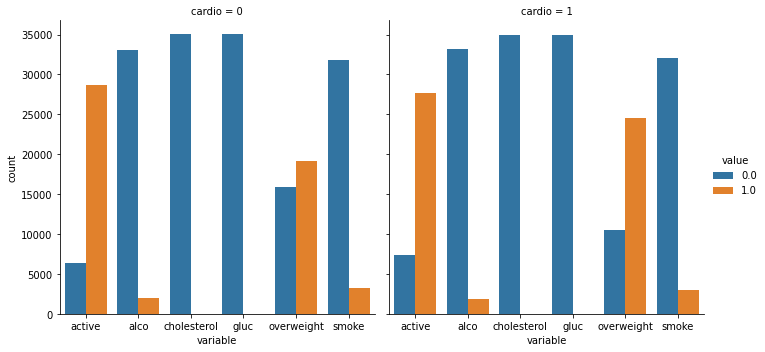

In [ ]:
g = sns.catplot(data=df_cat, kind='count', x='variable', hue='value',col="cardio")

In [ ]:
df_cat.value_counts().reset_index(name='total')

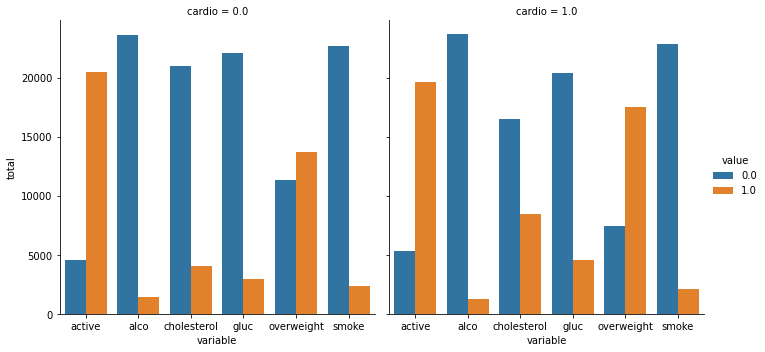

In [ ]:
    # Draw the catplot with 'sns.catplot()'
    fig = sns.catplot(
        data=df_cat,
        x="variable",
        y="total",
        hue="value",
        col="cardio",
        kind="bar",
        order=var,
    )
    fig.set_ylabels("total")
    fig.set_xlabels("variable")
    fig 

In [ ]:
df_filter = df[df['ap_lo'] <= df['ap_hi']]

df_heat = df_filter[(df_filter["height"] >= df["height"].quantile(0.025))
  & (df["height"] <= df["height"].quantile(0.975))
  & (df["weight"] >= df["weight"].quantile(0.025))
  & (df["weight"] <= df["weight"].quantile(0.975))]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [ ]:
df_heat

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0.0,0.0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1.0,1.0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1.0,0.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1.0,1.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49955,71302,21078,1,168,74.0,120,80,0,0,0,0,0,1.0,1.0
49956,71303,18893,2,170,85.0,130,80,0,0,0,0,1,1.0,1.0
49957,71304,21323,1,158,78.0,140,90,0,0,0,0,1,0.0,1.0
49958,71308,16127,2,168,72.0,120,80,0,1,1,0,1,0.0,1.0


In [ ]:
corr = df_heat.corr()
corr

In [ ]:
mask = np.triu(corr)
mask

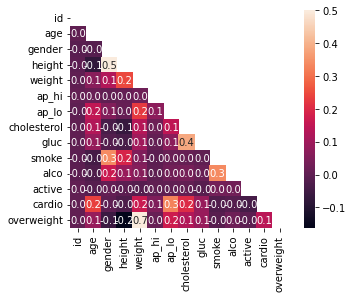

In [ ]:
    ax = sns.heatmap(corr,
                     annot=True,
                     fmt='.1f',
                     mask=mask,
                     vmax=.5,
                     square=True,)